<a href="https://colab.research.google.com/github/mcnica89/Markov-Chains-RL-W24/blob/main/PIG_markov_chains_and_value_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Quick Code Up of PIG using "sub-Markov" chain


In [2]:
def hit_below_l_PIG_sub_matrix(l):
  # Only give probabilities for "alive" states
  n_max = l+6 #can never exceed l+6 with this strategy!
  M = np.zeros((n_max+1,n_max+1))

  for start_ix in range(l): #choose to roll again states!
      for dice_roll in range(1,6+1):
        if dice_roll == 1:
          pass #do nothing here! The extra probability is "lost"
        else:
          end_ix = start_ix + dice_roll
          M[start_ix,end_ix] += 1/6

  for start_ix in range(l,n_max+1): #choose to stop states
      end_ix = start_ix
      M[start_ix,end_ix] = 1

  return M

M = hit_below_l_PIG_sub_matrix(20)

def value_func(l):
  M = hit_below_l_PIG_sub_matrix(l)
  n_max = l+6

  prize_vec = np.arange(n_max+1)
  t_max = l #after t rolls you are definetly finished!
  return np.linalg.matrix_power(M,t_max) @ prize_vec

def p_busted(l):
  M = hit_below_l_PIG_sub_matrix(l)
  n_max = l+6

  p_0 = np.zeros(n_max+1)
  p_0[0] = 1

  t_max = l #after t rolls you are definetly finished!

  p_alive = np.sum(p_0 @ np.linalg.matrix_power(M,t_max))
  return 1-p_alive



l=0,v_list[l]=0.0
l=1,v_list[l]=3.333333333333333
l=2,v_list[l]=3.333333333333333
l=3,v_list[l]=3.833333333333333
l=4,v_list[l]=4.305555555555555
l=5,v_list[l]=4.824074074074074
l=6,v_list[l]=5.37962962962963
l=7,v_list[l]=5.973765432098765
l=8,v_list[l]=6.244598765432098
l=9,v_list[l]=6.579475308641975
l=10,v_list[l]=6.873713991769547
l=11,v_list[l]=7.141418038408777
l=12,v_list[l]=7.3738640260630985
l=13,v_list[l]=7.566793838591677
l=14,v_list[l]=7.716227994970278
l=15,v_list[l]=7.847597307956102
l=16,v_list[l]=7.951606200464866
l=17,v_list[l]=8.031577257341358
l=18,v_list[l]=8.088571236917643
l=19,v_list[l]=8.124622367387676
l=20,v_list[l]=8.14179489372703
l=21,v_list[l]=8.14179489372703
l=22,v_list[l]=8.12596312247914
l=23,v_list[l]=8.095693895781409
l=24,v_list[l]=8.05237055222043
l=25,v_list[l]=7.997181680701275
l=26,v_list[l]=7.931182633564575
l=27,v_list[l]=7.8553590854601
l=28,v_list[l]=7.770887137965188
l=29,v_list[l]=7.678607120373543
l=30,v_list[l]=7.57939288900019
l=31,v_l

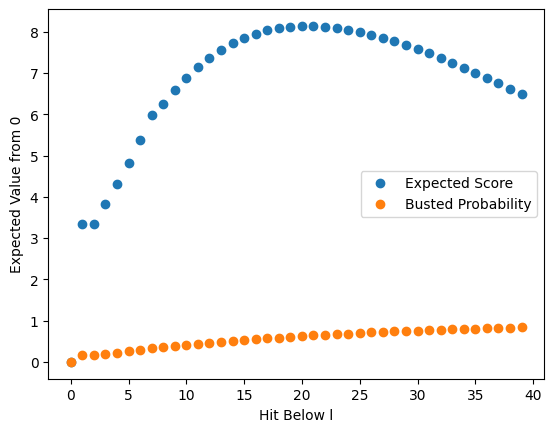

In [5]:
l_list = []
v_list = []
p_list = []
for l in range(40):
  l_list.append(l)
  v_list.append(value_func(l)[0])
  print(f"{l=},{v_list[l]=}")
  p_list.append(p_busted(l))

plt.plot(l_list,v_list,'o',label="Expected Score")
plt.plot(l_list,p_list,'o',label="Busted Probability")

plt.xlabel("Hit Below l")
plt.ylabel("Expected Value from 0")
plt.legend()

# Value iteration

Solve the Bellman equation

$$v_\pi(s) = \max \{ \frac{1}{6}v(s+2)+\ldots+\frac{1}{6}v(s+6), s\}$$

by value iteration. I.e. set

$$v^{(k)}_\pi(s) = \max \{ \frac{1}{6}v^{(k-1)}(s+2)+\ldots+\frac{1}{6}v^{(k-1)}(s+6), s\}$$

and then hope that $v^{(k)}$ converges.


v0: [0. 1. 2. 3. 4.]
v1: [3.33333333 4.16666667 5.         5.83333333 6.66666667]
v2: [5.55555556 6.25       6.94444444 7.63888889 8.33333333]
v3: [6.94444444 7.52314815 8.10185185 8.68055556 9.25925926]
v4: [7.71604938 8.19830247 8.68055556 9.16358025 9.64891975]
v5: [8.04475309 8.45563272 8.87319959 9.30028292 9.73996914]
v6: [8.12952246 8.51099537 8.90697874 9.31933728 9.74976423]
v7: [8.1410108  8.51695388 8.90978652 9.32051612 9.7501929 ]
v8: [8.14177288 8.51724859 8.90988476 9.32054291 9.75019826]
v9: [8.14179471 8.51725404 8.90988575 9.32054301 9.75019826]
v10: [8.14179489 8.51725406 8.90988575 9.32054301 9.75019826]
v11: [8.14179489 8.51725406 8.90988575 9.32054301 9.75019826]
k=0,v[k,0]=0.0
k=1,v[k,0]=3.3333333333333335
k=2,v[k,0]=5.555555555555555
k=3,v[k,0]=6.944444444444444
k=4,v[k,0]=7.71604938271605
k=5,v[k,0]=8.044753086419753
k=6,v[k,0]=8.129522462277093
k=7,v[k,0]=8.141010802469136
k=8,v[k,0]=8.141772881420515
k=9,v[k,0]=8.141794711807144
k=10,v[k,0]=8.141794893727031


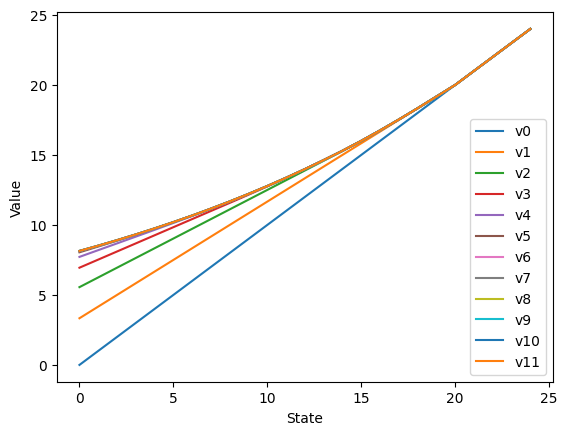

In [6]:
#np.indices solution

n_max = 50
num_iters = 13

v = np.zeros((num_iters,n_max+1),dtype=float)
v[0,:] = np.arange(n_max+1,dtype=float)

for k in range(num_iters-1):
  print(f"v{k}: {v[k,:5]}")
  x = np.indices((n_max-6,))
  v[k+1,x] = np.maximum(v[k,x+2]/6. + v[k,x+3]/6.+v[k,x+4]/6.+v[k,x+5]/6.+v[k,x+6]/6. ,x)


for k in range(num_iters-1):
  plt.plot(v[k,:25],label=f'v{k}')
  print(f"{k=},{v[k,0]=}")

plt.ylabel("Value")
plt.xlabel("State")
plt.legend()

k=0,v[k,0]=0.0
k=1,v[k,0]=3.333333333333333
k=2,v[k,0]=5.555555555555555
k=3,v[k,0]=6.944444444444443
k=4,v[k,0]=7.716049382716048
k=5,v[k,0]=8.044753086419751
k=6,v[k,0]=8.12952246227709
k=7,v[k,0]=8.141010802469133
k=8,v[k,0]=8.141772881420513
k=9,v[k,0]=8.14179471180714
k=10,v[k,0]=8.14179489372703
k=11,v[k,0]=8.14179489372703


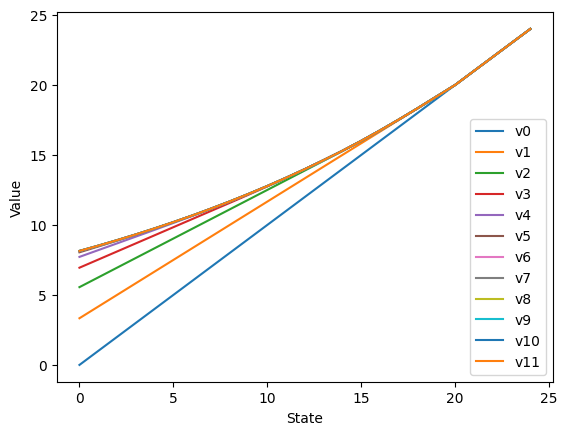

In [7]:
#Matrix solution for the same thing
def roll_forward_matrix(n_max):
  #matrix for the operation 1/6 v(s+2)+...+1/6 v(s+6).
  # Note: this is a sub-probability matrix
  M = np.zeros((n_max+1,n_max+1))
  for start_ix in range(n_max+1):
    for dice_roll in [2,3,4,5,6]:
      end_ix = start_ix + dice_roll
      if end_ix > n_max:
        end_ix = n_max
      M[start_ix,end_ix] += 1/6
  return M

np.round(roll_forward_matrix(10),2)

n_max = 50
M_roll_again = roll_forward_matrix(n_max)


num_iters = 13
v = np.zeros((num_iters,n_max+1),dtype=float)
v[0,:] = np.arange(n_max+1,dtype=float)

for k in range(num_iters-1):
  v[k+1,:] = np.maximum( M_roll_again@v[k,:] , np.arange(n_max+1))

for k in range(num_iters-1):
  plt.plot(v[k,:25],label=f'v{k}')
  print(f"{k=},{v[k,0]=}")

plt.ylabel("Value")
plt.xlabel("State")
plt.legend()

k=0,v[k,0]=0.0
k=1,v[k,0]=3.333333333333333
k=2,v[k,0]=5.555555555555555
k=3,v[k,0]=6.944444444444443
k=4,v[k,0]=7.716049382716048
k=5,v[k,0]=8.044753086419751
k=6,v[k,0]=8.12952246227709
k=7,v[k,0]=8.141010802469133
k=8,v[k,0]=8.141772881420513


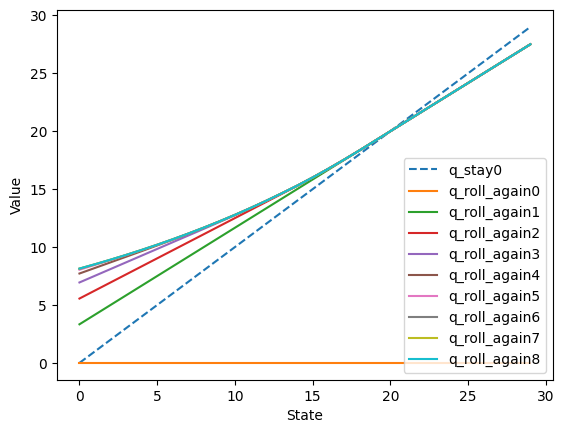

In [8]:
#Matrix solution for the same thing
def roll_forward_matrix(n_max):
  #matrix for the operation 1/6 v(s+2)+...+1/6 v(s+6).
  # Note: this is a sub-probability matrix
  M = np.zeros((n_max+1,n_max+1))
  for start_ix in range(n_max+1):
    for dice_roll in [2,3,4,5,6]:
      end_ix = start_ix + dice_roll
      if end_ix > n_max:
        end_ix = n_max
      M[start_ix,end_ix] += 1/6
  return M

np.round(roll_forward_matrix(10),2)

n_max = 50
M_roll_again = roll_forward_matrix(n_max)


num_iters = 10

q_roll_again = np.zeros((num_iters,n_max+1),dtype=float)
q_stay = np.zeros((num_iters,n_max+1),dtype=float)

q_roll_again[0,:] = np.zeros(n_max+1,dtype=float)
q_stay[0,:] = np.arange(n_max+1,dtype=float)


for k in range(num_iters-1):
  q_stay[k+1,:] = np.arange(n_max+1,dtype=float)
  q_roll_again[k+1,:] = M_roll_again @ np.maximum(q_roll_again[k,:],q_stay[k,:])


plt.plot(q_stay[0,:30],'--',label=f'q_stay{0}')

for k in range(num_iters-1):
  plt.plot(q_roll_again[k,:30],label=f'q_roll_again{k}')
  print(f"{k=},{v[k,0]=}")

plt.ylabel("Value")
plt.xlabel("State")
plt.legend()